In [1]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('test.jpg')

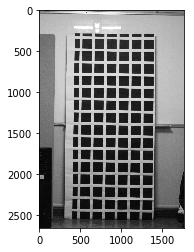

In [3]:
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(grayImg, cmap = "gray")

In [8]:
height, width = grayImg.shape
print height , width

2655 1761


In [18]:
gray = np.float32(grayImg)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]
cv2.imwrite('Harris.jpg',img)

True

In [20]:
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(30,30),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
#img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite('subpixel5.png',img)
print res[:,3],";" , res[:,2] ,";"

[1327   30   37   37  285  285  285  286  285  287  288  288  288  289  289
  291  291  294  318  319  319  321  323  323  324  325  327  327  329  352
  352  353  355  355  357  357  358  359  360  361  361  362  364  466  467
  468  468  469  471  471  473  474  475  475  476  477  499  500  500  502
  503  504  504  507  507  509  509  511  511  512  615  615  615  617  617
  619  620  621  622  624  624  625  625  626  649  649  650  651  651  653
  654  655  656  658  658  659  659  661  764  764  765  766  767  768  769
  770  771  773  773  774  774  775  798  798  799  800  800  802  802  804
  804  806  808  808  811  913  914  914  916  916  917  918  919  920  922
  922  924  924  925  948  948  949  950  950  951  952  954  954  956  956
  958  959  961 1064 1064 1064 1065 1066 1068 1068 1070 1070 1072 1073 1074
 1075 1076 1098 1098 1098 1100 1100 1102 1102 1104 1104 1106 1106 1108 1108
 1110 1213 1214 1214 1216 1216 1218 1218 1220 1221 1222 1223 1225 1225 1226
 1247 1248 1